In [28]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Data Analysis Document


In [29]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [387]:
#read all files

import os
from os.path import join

AllFile = []
def main() :
    dest = "E:\github\lab-data-processing\data"
    for root, dirs, files in os.walk( dest ):
        for OneFileName in files :
            if OneFileName.find( '.txt' ) == -1 :
                continue
            OneFullFileName = join( root, OneFileName )
            AllFile.append(OneFullFileName)
        return AllFile

文件数量

In [388]:
file = main()
len(file)

30

#### Detail information extract

In [32]:
class DataContentDecode:
    """Get the detail information
    
    This class help to decode the file and get the describe information
    and data information.
    
    Attributes:
        debug(int):             debug mode. 0 close and 1 open
        
        trailName(int):         the number of the trail 
        pelteirNumber(int):     the number of the peltier 0 - 8
        subPelterNumber(int):   the index of the sub peltier 1 or 2
        sex(int):               male 1   female 0
        used(int):              used 1    unused 0
        experimenter(int):      Hu 1   YZH 0
        protocol(int):          A 1   B 0
        rawData(pd.DataFrame):  data source
    
    """
    def __init__(self,fileName):
        self.fileName = fileName      #the .txt file name
        self.debug = 0
    
    def fileDecode(self):             #get the detail information
        f = open(self.fileName,"r")
        d = f.readlines()
        headNumber = int(d[0][-5:-3])-2
        
        ''' get detail describe of data'''
        for i in range(headNumber-2):
            if(d[i].find("Trial name")!=-1):
                self.trailName = int(re.findall(r"[0-9]+",d[i])[0])
                if(self.debug):
                    print("trainName:",int(re.findall(r"[0-9]+",d[i])[0]))
            if(d[i].find("Arena name")!=-1):
                numFind = re.findall(r"[0-9]+",d[i])
                self.peltierNumber = int(numFind[0])
                self.subPeltierNumber = int(numFind[-1])
                if(self.debug):
                    print("peltierNumber:",peltierNumber,"subPeltierNumber:",subPeltierNumber)
            if(d[i].find("Sex")!=-1):
                if(d[i][7:-3]=="male"):
                    self.sex = 1
                else:
                    self.sex = 0
                if(self.debug):
                    print("sex:",sex)
            if(d[i].find("Used")!=-1):
                if(d[i][8:-3]=="Used"):
                    self.used = 1
                else:
                    self.used = 0               
                if(self.debug):
                    print("used:",used)
            if(d[i].find("Experimenter")!=-1):
                if(d[i][16:-3]=="Hu"):
                    self.experimenter = 1
                else:
                    self.experimenter = 0
                if(self.debug):
                    print("experimenter:",experimenter)
            if(d[i].find("Protocol")!=-1):
                if(d[i][12:-3]=="A"):
                    self.protocol = 1
                else:
                    self.protocol = 0
                if(self.debug):
                    print("protocol:",protocol)
        
        ''' get raw data '''
        head = [j for i,j in enumerate(list(d[int(d[0][-5:-3])-2].split('"'))) if i%2 !=0 ]
        if(self.debug):
            print(head)
        dataFrame = {i:[] for i in head}

        for i in d[headNumber+2:]:
            for index,data in zip(dataFrame,i.split(";")[:-1]):
                if data=='"-"':
                    data=np.nan
                dataFrame[index].append(data)
        self.rawData = pd.DataFrame(dataFrame)
        if(self.debug):
            print(self.rawData.head())
        
        
        f.close()

#### Extract all file

In [33]:
class GetAllFile:
    """Get the all file 
    
    This class help to decode all the file and get their detail information
    
    Attributes:
        dataContentDecodeList:  list of DataContentDecode Oject
    
    """
    def __init__(self,fileList):
        self.fileList = fileList
        self.dataContentDecodeList = []
    
    def getDataContentDecodeList(self):
        for i in self.fileList:
            t = DataContentDecode(i)
            t.fileDecode()
            self.dataContentDecodeList.append(t)
    

In [34]:
t  = GetAllFile(file)
t.getDataContentDecodeList()

In [35]:
bb = t.dataContentDecodeList

In [36]:
j  = 0
for i in bb:
    if i.sex == 1:
        j+=1
    print(i.trailName,i.peltierNumber,i.sex,i.experimenter)
print( "number of 5 :",j )

5 5 1 1
5 5 1 1
5 6 1 1
5 6 1 1
5 7 1 1
5 7 1 1
5 8 1 1
5 8 1 1
6 5 1 1
6 5 1 1
6 6 1 1
6 6 1 1
6 7 1 1
6 7 1 1
6 8 1 1
6 8 1 1
7 5 1 1
7 5 1 1
7 6 1 1
7 6 1 1
7 7 1 1
7 7 1 1
7 8 1 1
7 8 1 1
8 5 1 1
8 5 1 1
8 6 1 1
8 6 1 1
8 8 1 1
8 8 1 1
number of 5 : 30


#### Data filter

In [37]:
class DataAnalysis:
    """Data analysis 
    
    This class help to analyze data
    
    Attributes:
        dataContentDecodeList:  list of DataContentDecode Oject
    
    """
    def __init__(self):
            t = GetAllFile(file)
            t.getDataContentDecodeList()
            self.extractedFile = t.dataContentDecodeList
    
   
    
    
    
    
    #--------------------------- Filter module start ---------------------#
        
    
    """
    trailName = -1   means all trail
    trailName: list
    """
    def dataFilterTrailName(self,trailName,rawData):
        result = []
        if trailName == -1:
            return rawData
        else:
            for i in trailName:
                for j in rawData:
                    if(j.trailName == i):
                        result.append(j)
        return result
    
    
    '''
    Experimenter = -1 means all trail
    1 : Hu          
    0 : ZhengHong
    '''
    def dataFilterExperimenter(self,experimenter,rawData):
        result = []
        if experimenter == -1:
            return rawData
        else:
            for j in rawData:
                if(j.experimenter == experimenter):
                    result.append(j)
        return result
            
    
    '''
    1  :  Used
    0  :  unUsed
    '''
    def dataFilterUsed(self,used,rawData):
        result = []
        for j in rawData:
            if(j.used == used):
                result.append(j)
        return result
    
    
    '''
    peltierNumber(list):    [0-8]
    '''
    def dataFilterPeltierNumber(self,peltierNumber,rawData):
        result = []
        if peltierNumber == -1:
            return rawData
        else:
            for i in peltierNumber:
                for j in rawData:
                    if(j.peltierNumber == i):
                        result.append(j)
        return result
    
    
    '''
    sex(int):  male 1,  female 0,   All -1
    '''
    def dataFilterSex(self,sex,rawData):
        result = []
        if sex == -1:
            return rawData
        else:
            for j in rawData:
                if(j.sex == sex):
                    result.append(j)
        return result
        
    
    '''
    protocol(int):  A  1,  B  0,  All  -1
    '''
    def dataFilterProtocol(self,protocol,rawData):
        result = []
        if(protocol == -1):
            return rawData
        
        for j in rawData:
            if(j.protocol == protocol):
                result.append(j)
        return result
    
    
    #--------------------------- Filter module end  ---------------------#
    '''
    Get all trailName
    '''
    def trailNameObtainInData(self):
        trailName = []
        for i in self.extractedFile:
            trailName.append(i.trailName)
        
        return set(trailName)
    
    
    '''
    choose data from the following parapeters
    '''
    def chooseData(self,trailName,peltierNumber,used,sex,experimenter,protocol):
        result = self.dataFilterTrailName(trailName,self.extractedFile)
        result = self.dataFilterExperimenter(experimenter,result)
        result = self.dataFilterUsed(used,result)
        result = self.dataFilterProtocol(protocol,result)
        result = self.dataFilterPeltierNumber(peltierNumber,result)
        result = self.dataFilterSex(protocol,result)
        return result
    
    
    
    
    '''
    input you filter information
    '''
    def dataFilter(self):
        rawData = self.extractedFile
    
        print("Please input filter information")
        print("Detail parameters")
        print("   trailName:     input [1,2,3]  or -1(all trail)")
        print("                  trailName choosed form",self.trailNameObtainInData())
        print("   peltierNumber: input [1,2,3] or -1(all peltierNumber)")
        print("   used:          used 1, unused 0")
        print("   sex:           male 1, female 0, All -1")
        print("   experimenter:  Hu 1,  YZH 0, All -1")
        print("   protocol:      A 1, B 0, All -1")
        print("")
        
        print("Please input you choose")
        
        trailName = eval(input("TrailName:"))
        while(True):
            if(type(trailName)==type([]) or trailName == -1):
                break;
            else:
                print("input wrong,please input again")
                trailName = input("TrainName:")
        
        
        
                
                
        
        peltierNumber = eval(input("PeltierNumber:"))
        while(True):
            if(type(peltierNumber) == type([]) or peltierNumber == -1):
                break;
            else:
                print("input wrong,please input again")
                peltierNumber = eval(input("PeltierNumber:"))
                
        used = eval(input("Used:"))
        while(True):
            if(used== 0 or used==1):
                break;
            else:
                print("input wrong,please input again")
                used = eval(input("Used:"))
        
        
        sex = eval(input("Sex:"))
        while(True):
            if(sex== 0 or sex==1 or sex==-1 ):
                break;
            else:
                print("input wrong,please input again")
                sex = eval(input("Sex:"))
                
                
        experimenter = eval(input("Experimenter:"))
        while(True):
            if(experimenter== 0 or experimenter==1 or experimenter==-1 ):
                break;
            else:
                print("input wrong,please input again")
                experimenter = eval(input("Experimenter:"))
        
        
        
        
        protocol = eval(input("Protocol:"))
        while(True):
            if(protocol== 0 or protocol==1 or protocol==-1 ):
                break;
            else:
                print("input wrong,please input again")
                protocol = eval(input("Protocol:"))
    
        self.filterData = self.chooseData(trailName,peltierNumber,used,sex,experimenter,protocol)
        print(" ")
        print("Number of data",len(self.filterData))
                
    

In [38]:
#         trailName(int):         the number of the trail 
#         pelterNumber(int):      the number of the pelter 0 - 8
#         subPelterNumber(int):   the index of the sub pelter 1 or 2
#         sex(int):               male 1   female 0
#         used(int):              used 1    unused 0
#         experimenter(int):      Hu 1   YZH: 0
#         protocol(int):          A 1   B 0
#         rawData(pd.DataFrame):  data source

In [39]:

# t = DataAnalysis()
# a = t.dataFilterTrailName(-1,t.extractedFile)

t = DataAnalysis()
a = t.dataFilterProtocol(-1,t.extractedFile)

In [40]:
result = t.dataFilter()

Please input filter information
Detail parameters
   trailName:     input [1,2,3]  or -1(all trail)
                  trailName choosed form {8, 5, 6, 7}
   peltierNumber: input [1,2,3] or -1(all peltierNumber)
   used:          used 1, unused 0
   sex:           male 1, female 0, All -1
   experimenter:  Hu 1,  YZH 0, All -1
   protocol:      A 1, B 0, All -1

Please input you choose
TrailName:-1
PeltierNumber:-1
Used:1
Sex:-1
Experimenter:-1
Protocol:-1
 
Number of data 30


原始数据

In [199]:
data = t.filterData
data[0].rawData[110:140]

Area Areachange Elongation Movement Pretest Recording time Test  \
110  2.82759   0.883622   0.423227        0       1          4.400    0   
111  2.73923  0.0883622    0.43334        0       1          4.440    0   
112  3.00431    0.79526   0.402955        0       1          4.480    0   
113  2.73923   0.441811    0.47535        0       1          4.520    0   
114  3.00431   0.265087   0.384809        0       1          4.560    0   
115  2.82759   0.353449   0.423227        0       1          4.600    0   
116  3.09268    0.79526   0.425631        0       1          4.640    0   
117  3.18104   0.618535   0.510493        0       1          4.680    0   
118  2.91595   0.265087   0.390896        0       1          4.720    0   
119  3.00431    0.79526   0.421141        0       1          4.760    0   
120  3.18104   0.706898   0.469654        0       1          4.800    0   
121  2.91595    1.32543   0.389077        0       1          4.840    0   
122  2.91595    1.06035   0.410022        0       1          4.880    0   
123  2.82759    1.14871   0.423227        1       1          4.920    0   
124  3.00431   0.530173   0.402955        1       1          4.960    0   
125  3.09268   0.265087   0.255781        1       1          5.000    0   
126  2.82759   0.441811   0.423227        1       1          5.040    0   
127  2.73923  0.0883622   0.416852        1       1          5.080    0   
128  2.65087    0.79526   0.398105        1       1          5.120    0   
129  2.73923    0.79526   0.431796        1       1          5.160    0   
130  2.73923   0.706898   0.448128        1       1          5.200    0   
131  2.73923   0.353449   0.401131        1       1          5.240    0   
132  2.12069    0.79526   0.470588        1       1          5.280    0   
133  2.38578   0.265087   0.597214        0       1          5.320    0   
134  2.82759   0.441811    0.37945        0       1          5.360    0   
135   3.2694   0.441811   0.497336        0       1          5.400    0   
136  2.38578   0.883622   0.276748        0       1          5.440    0   
137  2.91595   0.706898   0.472623        0       1          5.480    0   
138  2.91595   0.706898   0.433297        0       1          5.520    0   
139  2.65087   0.265087    0.35034        0       1          5.560    0   

    Training Trial time  X center Y center  
110        0      4.400  -16.6262  10.1338  
111        0      4.440  -16.6394  10.0997  
112        0      4.480   -16.504  9.84254  
113        0      4.520  -16.3916  9.76704  
114        0      4.560  -16.3597  9.79264  
115        0      4.600  -16.3289  9.78248  
116        0      4.640  -16.1887  9.85707  
117        0      4.680  -16.0441  9.91054  
118        0      4.720  -16.0519  9.80951  
119        0      4.760  -15.8723  9.76616  
120        0      4.800  -15.7299  9.78664  
121        0      4.840  -15.4848   9.7062  
122        0      4.880  -15.1812  9.71253  
123        0      4.920  -14.8359  9.78924  
124        0      4.960  -14.8299  9.66707  
125        0      5.000  -14.8124  9.60745  
126        0      5.040  -14.8359  9.49198  
127        0      5.080  -14.8168   9.4869  
128        0      5.120  -14.8912  9.25274  
129        0      5.160  -15.0799  9.17253  
130        0      5.200  -15.2026  8.98379  
131        0      5.240  -15.2062  8.92695  
132        0      5.280  -15.3088   8.7691  
133        0      5.320  -15.1828   8.7592  
134        0      5.360  -15.1778  8.63149  
135        0      5.400  -15.0458  8.60904  
136        0      5.440  -15.0721  8.57644  
137        0      5.480  -14.9361  8.39861  
138        0      5.520  -14.9017  8.18967  
139        0      5.560  -14.9958   8.2193

In [312]:
import math
rd = data[0].rawData[110:141][["X center","Y center"]]
distance = []
for i in range(len(rd)-1):
    distance.append(math.sqrt((float(rd.iloc[i+1,0])-float(rd.iloc[i,0]))**2+(float(rd.iloc[i+1,1])-float(rd.iloc[i,1]))**2))
filterData = data[0].rawData[110:140][["Movement","X center","Y center"]]
filterData["distance"]=distance
filterData

Movement  X center Y center  distance
110        0  -16.6262  10.1338  0.036566
111        0  -16.6394  10.0997  0.290628
112        0   -16.504  9.84254  0.135403
113        0  -16.3916  9.76704  0.040902
114        0  -16.3597  9.79264  0.032432
115        0  -16.3289  9.78248  0.158807
116        0  -16.1887  9.85707  0.154169
117        0  -16.0441  9.91054  0.101331
118        0  -16.0519  9.80951  0.184758
119        0  -15.8723  9.76616  0.143865
120        0  -15.7299  9.78664  0.257962
121        0  -15.4848   9.7062  0.303666
122        0  -15.1812  9.71253  0.353718
123        1  -14.8359  9.78924  0.122317
124        1  -14.8299  9.66707  0.062135
125        1  -14.8124  9.60745  0.117837
126        1  -14.8359  9.49198  0.019764
127        1  -14.8168   9.4869  0.245695
128        1  -14.8912  9.25274  0.205040
129        1  -15.0799  9.17253  0.225118
130        1  -15.2026  8.98379  0.056954
131        1  -15.2062  8.92695  0.188264
132        1  -15.3088   8.7691  0.126388
133        0  -15.1828   8.7592  0.127808
134        0  -15.1778  8.63149  0.133895
135        0  -15.0458  8.60904  0.041886
136        0  -15.0721  8.57644  0.223874
137        0  -14.9361  8.39861  0.211753
138        0  -14.9017  8.18967  0.098655
139        0  -14.9958   8.2193  0.114486


#### Group data to master and yorked

In [42]:
## Group data with master and yorked
for i in data:
    print(i.trailName,i.peltierNumber,i.subPeltierNumber,i.protocol)
    

5 5 1 0
5 5 2 0
5 6 1 0
5 6 2 0
5 7 1 0
5 7 2 0
5 8 1 0
5 8 2 0
6 5 1 0
6 5 2 0
6 6 1 0
6 6 2 0
6 7 1 0
6 7 2 0
6 8 1 0
6 8 2 0
7 5 1 0
7 5 2 0
7 6 1 0
7 6 2 0
7 7 1 0
7 7 2 0
7 8 1 0
7 8 2 0
8 5 1 0
8 5 2 0
8 6 1 0
8 6 2 0
8 8 1 0
8 8 2 0


In [43]:
## Group data with master and yorked
class GroupData:
    '''
    Group data by their trailName and peltierNumber
    
    Attribute:
        data:                     data after filter
        master,yorked:            data divide by the property of master and yorked
        AllTrailName:             set of trail name
        dataDivideByTrailName:    dic of data by trail name
        
    '''
    
    def __init__(self,data):
        self.data = data
        self.master = []
        self.yorked = []
    
    
    '''
    get the set of trailName.
    '''
    def __getTrailName(self):
        self.AllTrailName = []
        for i in data:
            self.AllTrailName.append(i.trailName)
        self.AllTrailName = set(self.AllTrailName)
    
    
    '''
    group data by trailName and produce a dic with key of trailName
    '''
    def __groupData(self):
        self.__getTrailName()
        self.dataDivideByTrailName = {}
        for i in self.AllTrailName:
            self.dataDivideByTrailName[i]=[]
            for dataItem in self.data:
                if dataItem.trailName == i:
                    self.dataDivideByTrailName[i].append(dataItem)
    
    '''
    sort the data to make the data who has same trailName and peltierNumber 
    get together
    '''
    def __groupToMasterAndYorked(self):
        self.TempData = []
        for key in self.dataDivideByTrailName.keys():
            dicLength = len(self.dataDivideByTrailName[key])
            dicContent = self.dataDivideByTrailName[key]
            for i in range(dicLength-1):
                for j in range(i+1,dicLength):
                    if dicContent[i].peltierNumber == dicContent[j].peltierNumber:
                        self.TempData.append(dicContent[i])
                        self.TempData.append(dicContent[j])
            
       
                
    '''
    finial group function to get the master group and yorked group
    '''            
    def GetAllGroup(self):
        self.__groupData()
        self.__groupToMasterAndYorked()
        for i in range(len(self.TempData)):
            if i%2 == 0:
                pass
            else:
                if self.TempData[i].protocol == 1:
                    if self.TempData[i].subPeltierNumber == 1:
                        self.master.append(self.TempData[i])
                        self.yorked.append(self.TempData[i-1])
                    else:
                        self.yorked.append(self.TempData[i])
                        self.master.append(self.TempData[i-1])
                else:
                    if self.TempData[i].subPeltierNumber == 1:
                        self.yorked.append(self.TempData[i])
                        self.master.append(self.TempData[i-1])
                    else:
                        self.master.append(self.TempData[i])
                        self.yorked.append(self.TempData[i-1])
                    
    
        
        

In [44]:
gd = GroupData(data)
gd.GetAllGroup()

In [45]:
for i,j in zip(gd.master,gd.yorked):
    print("master",i.trailName,i.peltierNumber,i.subPeltierNumber)
    print("yorked",j.trailName,j.peltierNumber,j.subPeltierNumber)

master 8 5 2
yorked 8 5 1
master 8 6 2
yorked 8 6 1
master 8 8 2
yorked 8 8 1
master 5 5 2
yorked 5 5 1
master 5 6 2
yorked 5 6 1
master 5 7 2
yorked 5 7 1
master 5 8 2
yorked 5 8 1
master 6 5 2
yorked 6 5 1
master 6 6 2
yorked 6 6 1
master 6 7 2
yorked 6 7 1
master 6 8 2
yorked 6 8 1
master 7 5 2
yorked 7 5 1
master 7 6 2
yorked 7 6 1
master 7 7 2
yorked 7 7 1
master 7 8 2
yorked 7 8 1


## Data Analysis

In [174]:
class DataInfo:
    '''
    Get the detail information from the filtered data
    
    '''
    
    def __init__(self,master,yorked):
        self.master = master 
        self.yorked = yorked
    
    
    
    '''
    get percent of singleData
    singleData: piece of data
    '''
    def getMovementPercent(self,pieceOfData):
        movement = len(pieceOfData[pieceOfData["Movement"]=="1"])
        stay = len(pieceOfData[pieceOfData["Movement"]=="0"])
        percent = movement/len(pieceOfData)
        return percent
     
    
    def getPercentByHand(self):
        slic =[1500+i*1500 for i in range(7)] 
        self.masterF = pd.DataFrame()
        self.yorkedF = pd.DataFrame()
        for i in range(len(self.master)):
            result = []
            for j in slic:
                percent = self.getMovementPercent(self.master[i].rawData[j-1500:j])
                result.append(percent)
            self.masterF["{0}".format(i)]=result
        for i in range(len(self.yorked)):
            result = []
            for j in slic:
                percent = self.getMovementPercent(self.yorked[i].rawData[j-1500:j])
                result.append(percent)
            self.yorkedF["{0}".format(i)]=result
    
    def 
    

In [175]:
di = DataInfo(gd.master,gd.yorked)

In [176]:
di.getPercentByHand()

In [177]:
di.masterF

0         1         2         3         4         5         6  \
0  0.211333  0.860667  0.512667  0.797333  0.751333  0.800000  0.222000   
1  0.356667  0.729333  0.282000  0.724000  0.735333  0.687333  0.330000   
2  0.544000  0.619333  0.056000  0.688000  0.526000  0.744667  0.066667   
3  0.436667  0.668667  0.000667  0.775333  0.010000  0.539333  0.028000   
4  0.534000  0.782667  0.000000  0.455333  0.430667  0.708667  0.186667   
5  0.538667  0.662000  0.000667  0.694667  0.470667  0.649333  0.182000   
6  0.479333  0.500667  0.000000  0.697333  0.430667  0.372000  0.228667   

          7         8         9        10        11        12        13  \
0  0.286667  0.685333  0.006000  0.462000  0.788000  0.561333  0.480667   
1  0.530000  0.440000  0.057333  0.360667  0.676667  0.232000  0.647333   
2  0.439333  0.760667  0.052000  0.525333  0.659333  0.183333  0.682667   
3  0.349333  0.587333  0.138667  0.582000  0.436000  0.508667  0.566000   
4  0.258000  0.694000  0.107333  0.376667  0.843333  0.448000  0.601333   
5  0.156000  0.637333  0.192000  0.448667  0.617333  0.382000  0.781333   
6  0.178000  0.476000  0.017333  0.204000  0.518000  0.460667  0.512667   

         14  
0  0.938667  
1  0.922000  
2  0.850667  
3  0.865333  
4  0.878667  
5  0.892000  
6  0.680000

In [179]:
di.yorkedF

0         1         2         3         4         5         6  \
0  0.312667  0.793333  0.659333  0.292000  0.729333  0.640667  0.511333   
1  0.108000  0.700000  0.660667  0.278667  0.602667  0.500667  0.431333   
2  0.000667  0.460667  0.510000  0.092667  0.719333  0.374667  0.650000   
3  0.093333  0.660667  0.462000  0.236667  0.610667  0.157333  0.791333   
4  0.062667  0.468000  0.496667  0.095333  0.553333  0.308667  0.740667   
5  0.000000  0.450667  0.400667  0.295333  0.543333  0.148000  0.686000   
6  0.013333  0.430000  0.233333  0.276667  0.440000  0.058667  0.728667   

          7         8         9        10        11        12        13  \
0  0.317333  0.430667  0.497333  0.623333  0.832667  0.562667  0.500000   
1  0.228000  0.279333  0.384000  0.804667  0.509333  0.532667  0.160667   
2  0.038000  0.351333  0.274667  0.666667  0.512667  0.642667  0.174667   
3  0.022667  0.338667  0.141333  0.828667  0.188667  0.673333  0.114667   
4  0.379333  0.292000  0.132667  0.786667  0.580667  0.675333  0.033333   
5  0.145333  0.380667  0.253333  0.480667  0.744000  0.750000  0.134667   
6  0.264667  0.245333  0.316000  0.639333  0.636000  0.601333  0.013333   

         14  
0  0.894000  
1  0.806667  
2  0.808667  
3  0.776667  
4  0.852667  
5  0.842000  
6  0.645333

In [183]:
di.masterF.T.describe()

0          1          2          3          4          5  \
count  15.000000  15.000000  15.000000  15.000000  15.000000  15.000000   
mean    0.557600   0.514044   0.493200   0.432800   0.487022   0.486978   
std     0.278710   0.240528   0.274024   0.275669   0.269509   0.258002   
min     0.006000   0.057333   0.052000   0.000667   0.000000   0.000667   
25%     0.374333   0.343333   0.311333   0.244000   0.317333   0.287000   
50%     0.561333   0.530000   0.544000   0.508667   0.455333   0.538667   
75%     0.792667   0.705667   0.685333   0.584667   0.701333   0.655667   
max     0.938667   0.922000   0.850667   0.865333   0.878667   0.892000   

               6  
count  15.000000  
mean    0.383689  
std     0.213898  
min     0.000000  
25%     0.216333  
50%     0.460667  
75%     0.506667  
max     0.697333

In [186]:
di.yorkedF.T.describe()

0          1          2          3          4          5  \
count  15.000000  15.000000  15.000000  15.000000  15.000000  15.000000   
mean    0.573111   0.465822   0.418489   0.406444   0.430533   0.416978   
std     0.189989   0.224484   0.259021   0.291274   0.271947   0.258414   
min     0.292000   0.108000   0.000667   0.022667   0.033333   0.000000   
25%     0.464000   0.279000   0.224667   0.149333   0.212333   0.200667   
50%     0.562667   0.500667   0.460667   0.338667   0.468000   0.400667   
75%     0.694333   0.631667   0.646333   0.667000   0.628000   0.614667   
max     0.894000   0.806667   0.808667   0.828667   0.852667   0.842000   

               6  
count  15.000000  
mean    0.369467  
std     0.241727  
min     0.013333  
25%     0.239333  
50%     0.316000  
75%     0.618667  
max     0.728667

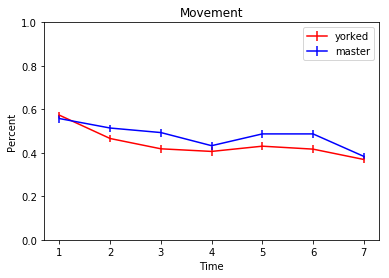

In [311]:
x = np.linspace(1,7,7)
y = di.yorkedF.T.describe().loc["mean"]
yerr = di.yorkedF.T.describe().loc["std"]
yerr = yerr/di.yorkedF.T.describe().iloc[0,0]
plt.ylim(0,1)
plt.xlabel("Time")
plt.ylabel("Percent")
plt.title("Movement")
plt.errorbar(x,y,yerr=yerr,color="red",label="yorked")

yMaster = di.masterF.T.describe().loc["mean"]
yerrMaster = di.masterF.T.describe().loc["std"]
yerrMaster = yerrMaster/di.masterF.T.describe().iloc[0,0]
plt.errorbar(x,yMaster,yerr=yerrMaster,color="blue",label="master")


plt.legend()
plt.show()

=======================================================The 0 Group================================================


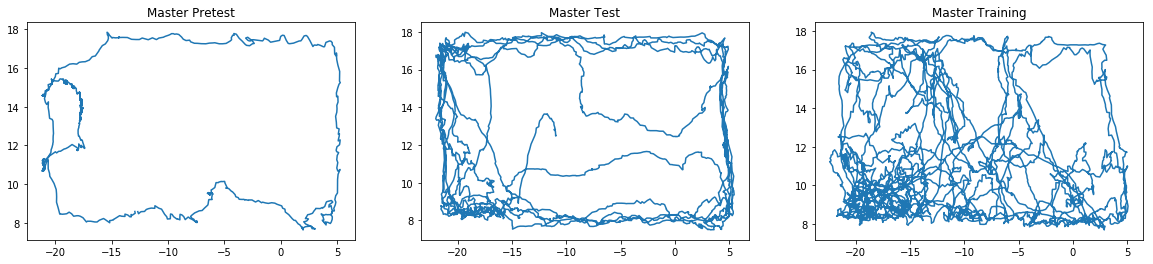

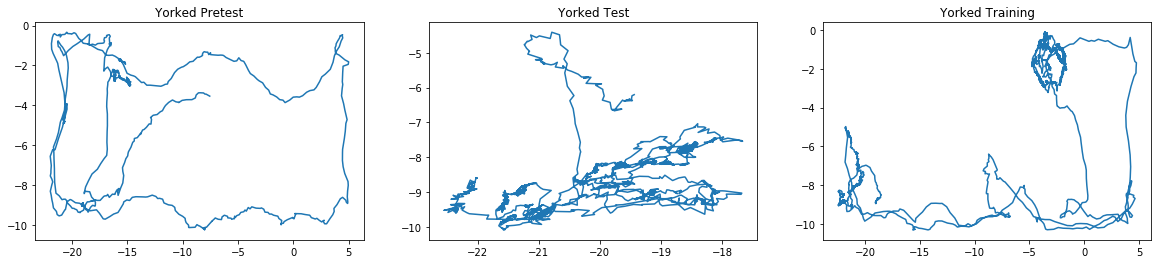

 
 
=======================================================The 1 Group================================================


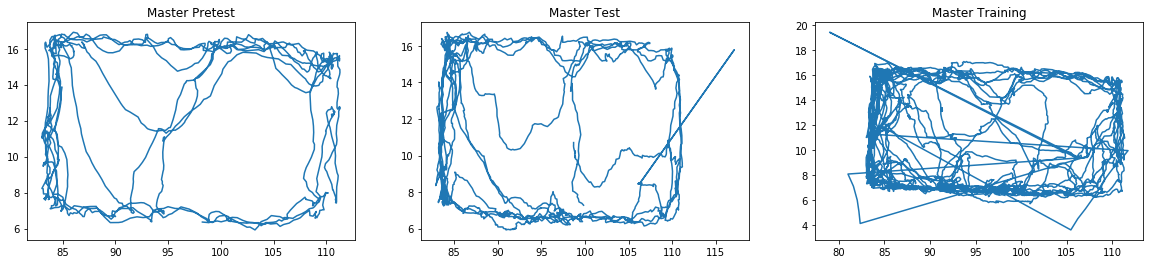

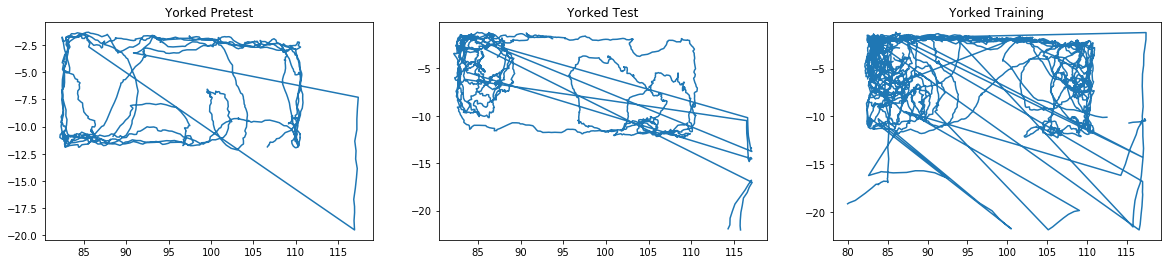

 
 
=======================================================The 2 Group================================================


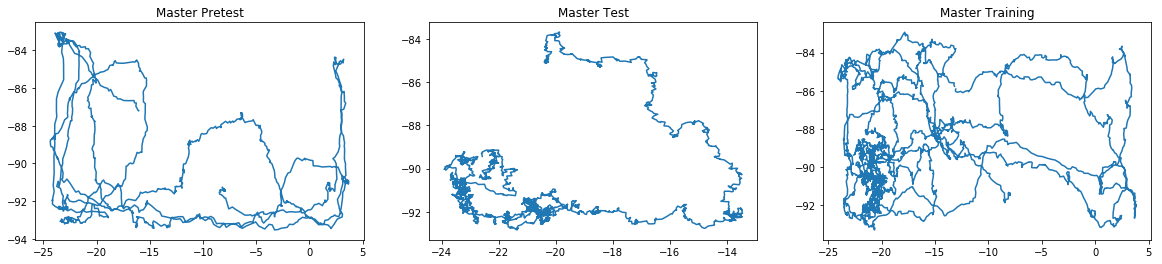

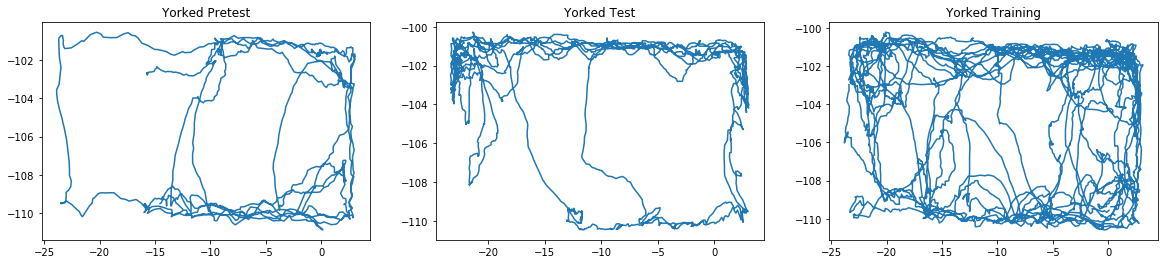

 
 
=======================================================The 3 Group================================================


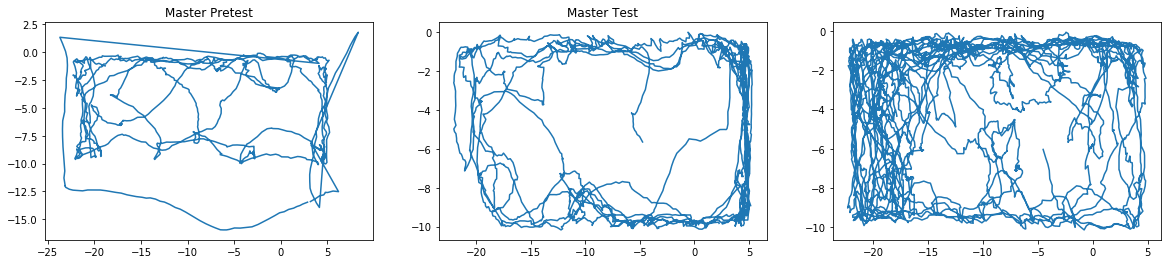

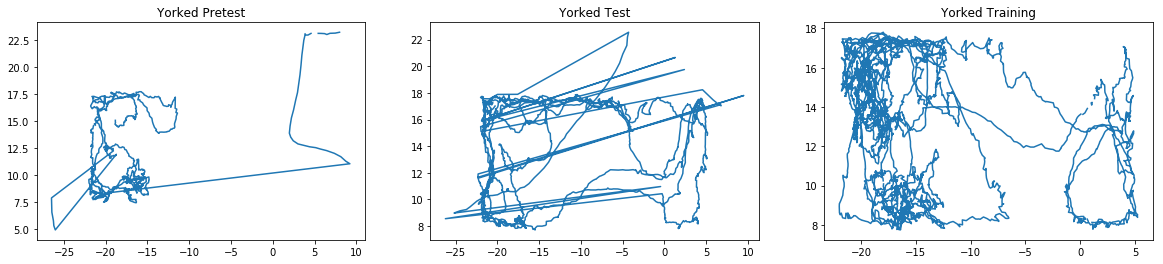

 
 
=======================================================The 4 Group================================================


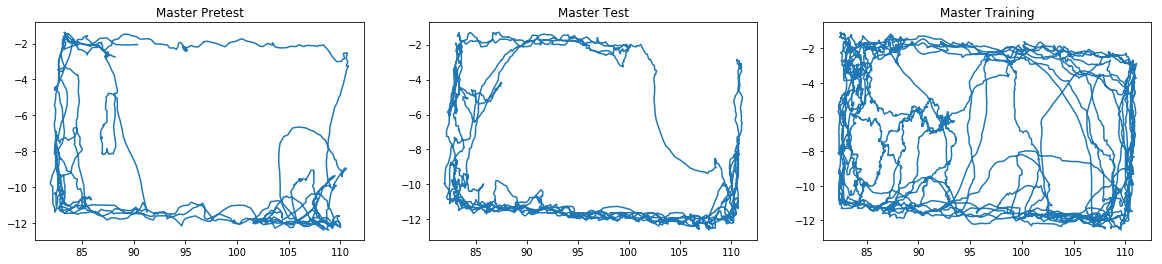

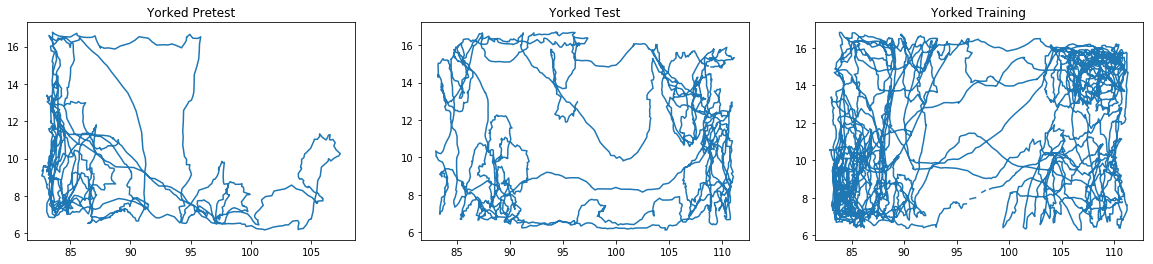

 
 
=======================================================The 5 Group================================================


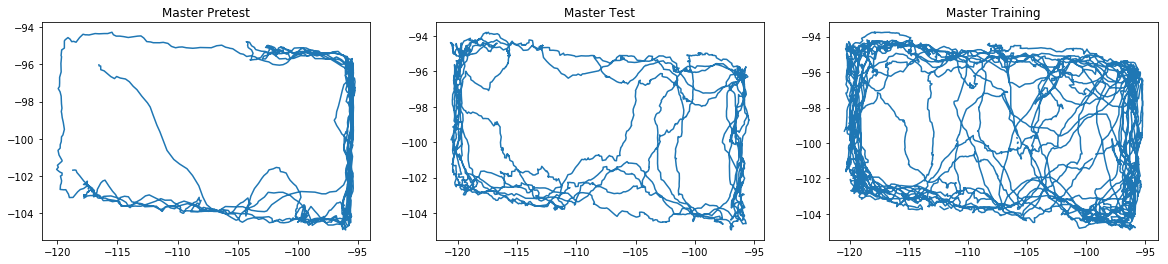

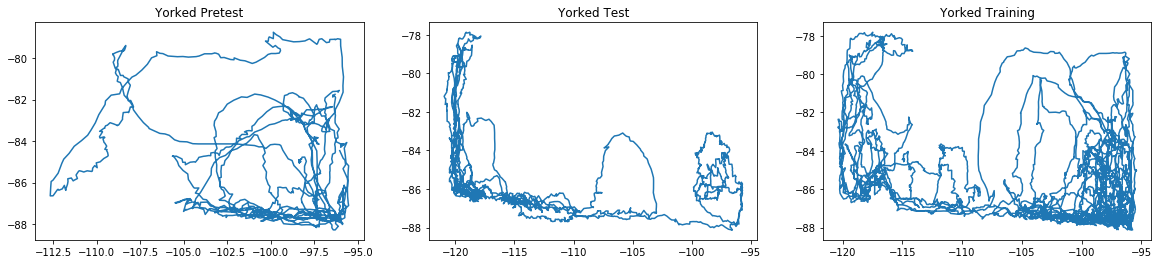

 
 
=======================================================The 6 Group================================================


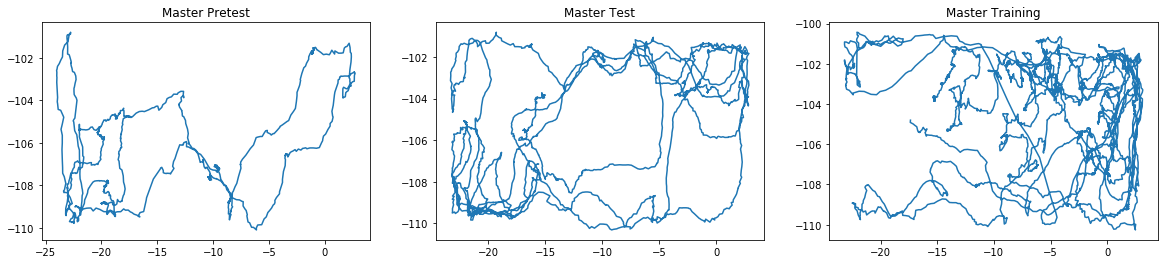

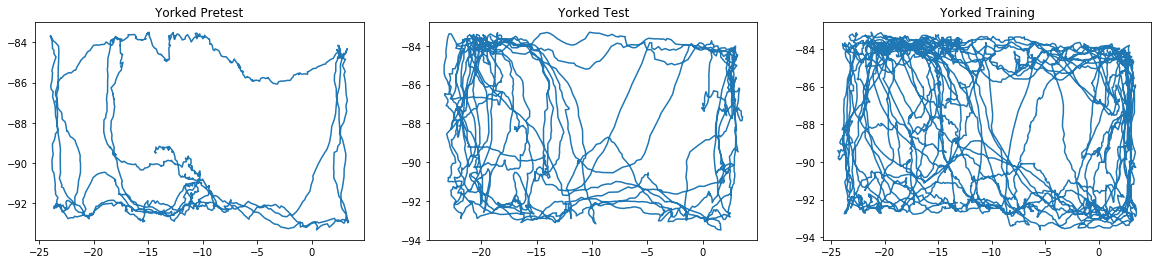

 
 
=======================================================The 7 Group================================================


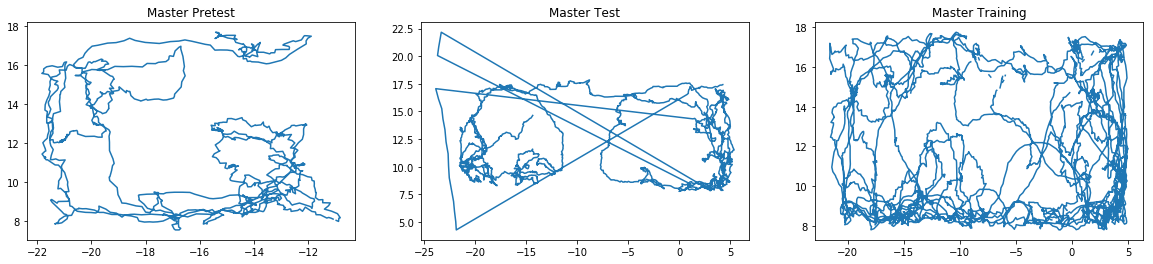

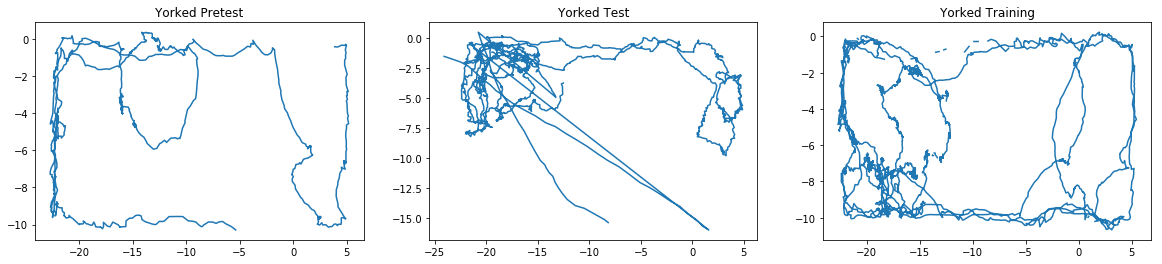

 
 
=======================================================The 8 Group================================================


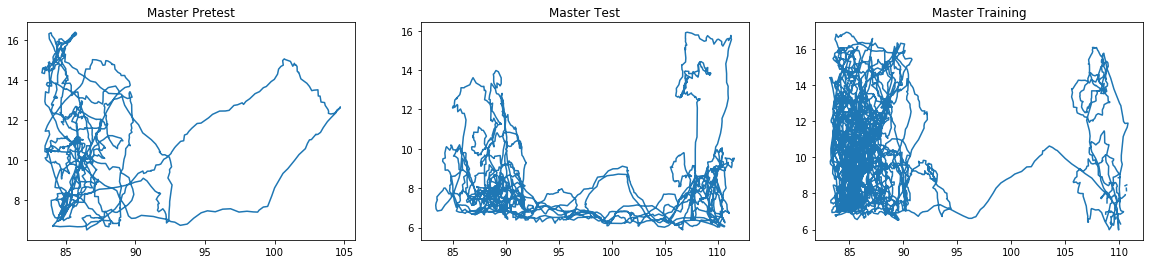

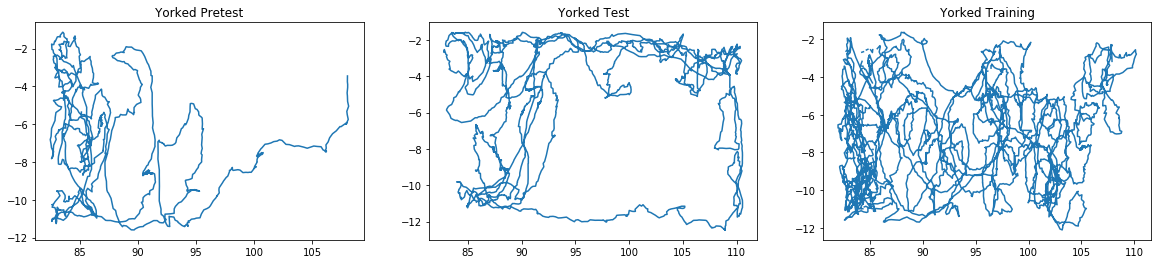

 
 
=======================================================The 9 Group================================================


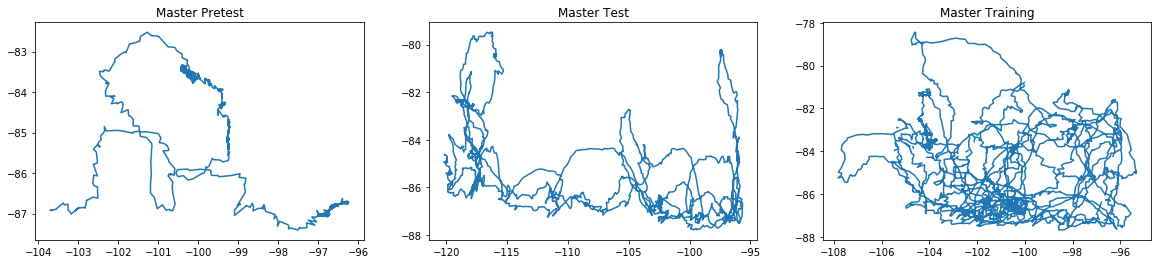

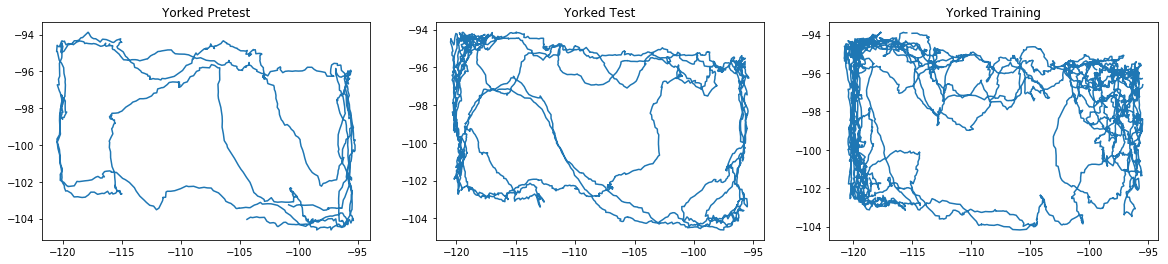

In [384]:
for i in range(10):
    print("=======================================================The {0} Group================================================".format(i))
    plt.figure(figsize=(20,4))
    plt.subplot(131)
    plt.plot(list(gd.master[i].rawData["X center"][gd.master[i].rawData.Pretest=="1"]), \
             list(gd.master[i].rawData["Y center"][gd.master[i].rawData.Pretest=="1"]))
    plt.title("Master Pretest")
    
    plt.subplot(132)
    plt.plot(list(gd.master[i].rawData["X center"][gd.master[i].rawData.Test=="1"]), \
             list(gd.master[i].rawData["Y center"][gd.master[i].rawData.Test=="1"]))
    plt.title("Master Test")
    
    plt.subplot(133)
    plt.plot(list(gd.master[i].rawData["X center"][gd.master[i].rawData.Training=="1"]),\
             list(gd.master[i].rawData["Y center"][gd.master[i].rawData.Training=="1"]))
    plt.title("Master Training")
    plt.show()
    ## yorked
    plt.figure(figsize=(20,4))
    plt.subplot(131)
    plt.plot(list(gd.yorked[i].rawData["X center"][gd.yorked[i].rawData.Pretest=="1"]), \
             list(gd.yorked[i].rawData["Y center"][gd.yorked[i].rawData.Pretest=="1"]))
    plt.title("Yorked Pretest")
    
    plt.subplot(132)
    plt.plot(list(gd.yorked[i].rawData["X center"][gd.yorked[i].rawData.Test=="1"]), \
             list(gd.yorked[i].rawData["Y center"][gd.yorked[i].rawData.Test=="1"]))
    plt.title("Yorked Test")
    
    plt.subplot(133)
    plt.plot(list(gd.yorked[i].rawData["X center"][gd.yorked[i].rawData.Training=="1"]),\
             list(gd.yorked[i].rawData["Y center"][gd.yorked[i].rawData.Training=="1"]))
    plt.title("Yorked Training")
    plt.show()
    print(" ")
    print(" ")
   
    
    
    
    

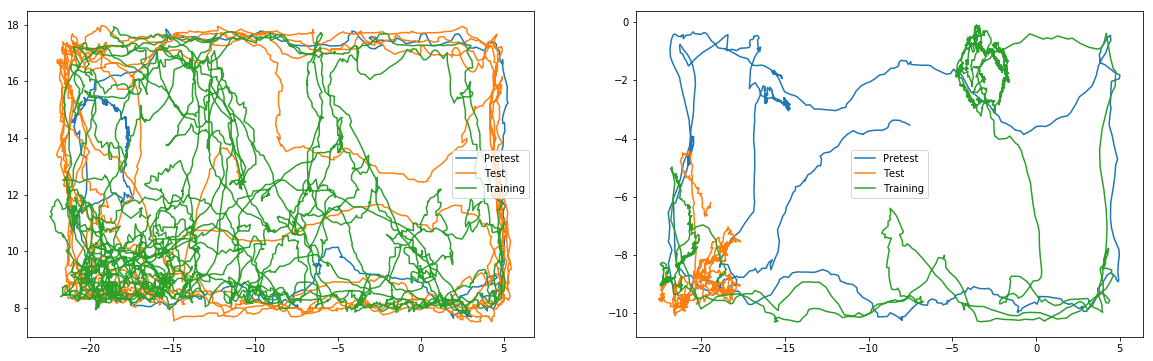

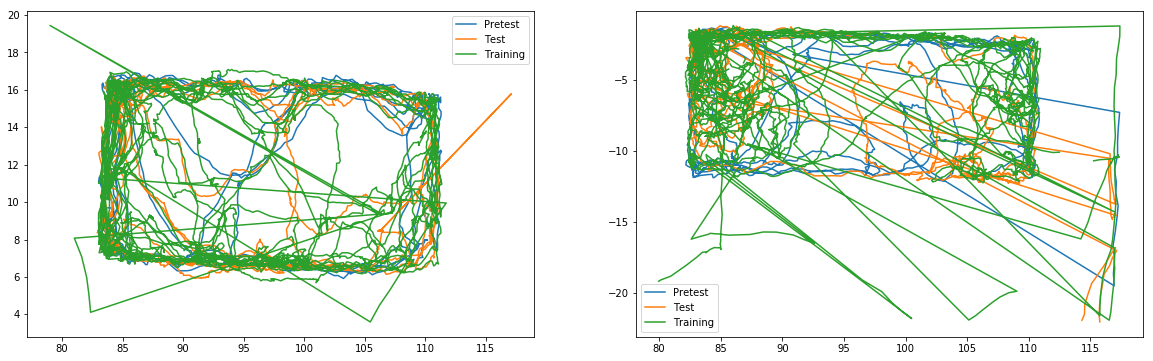

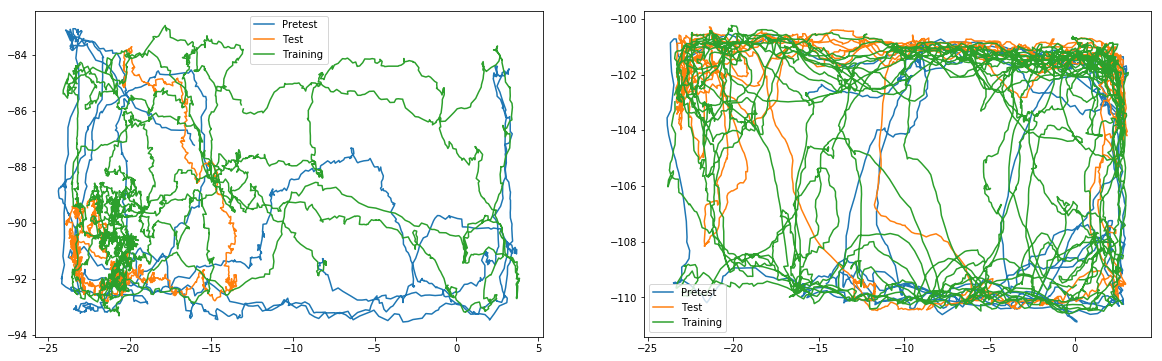

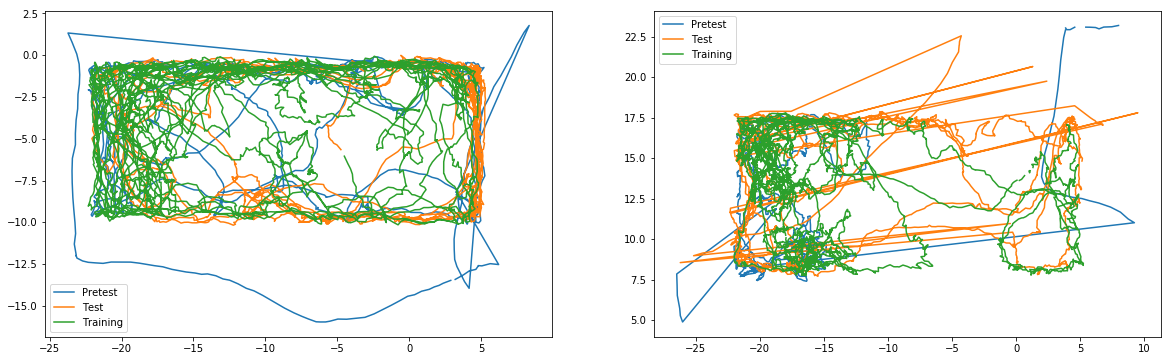

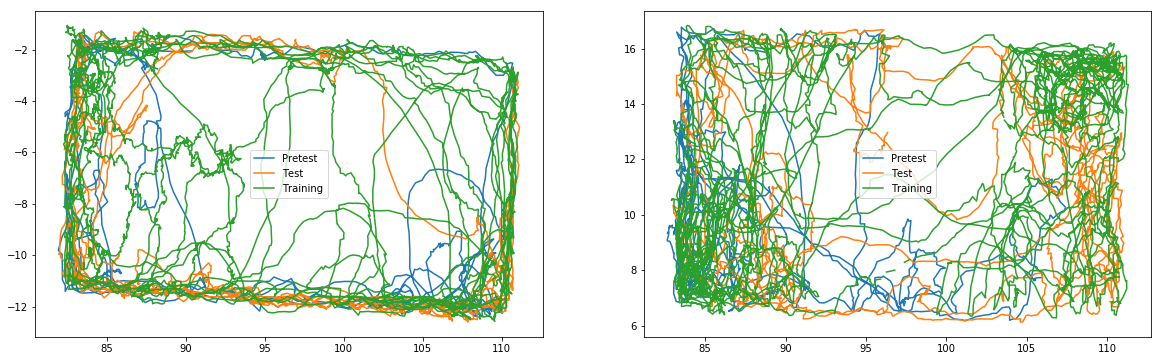

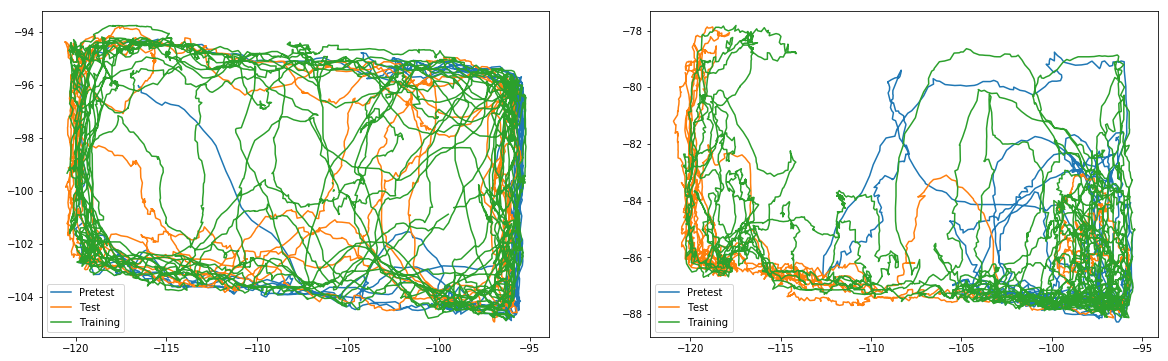

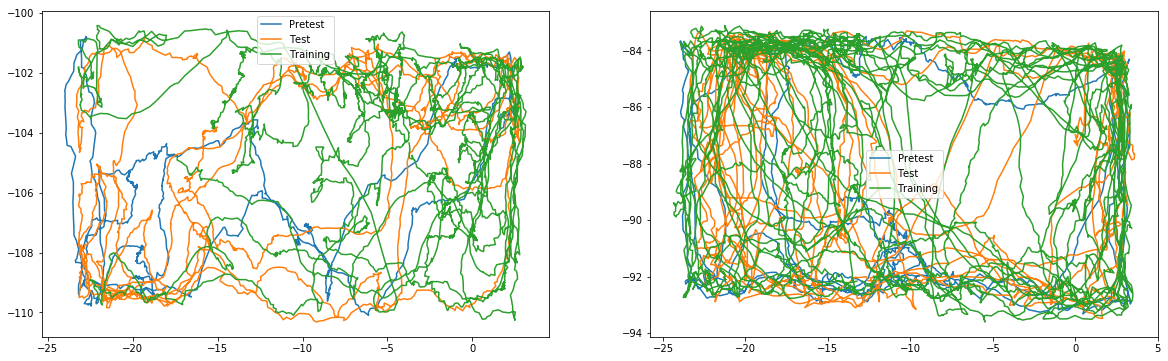

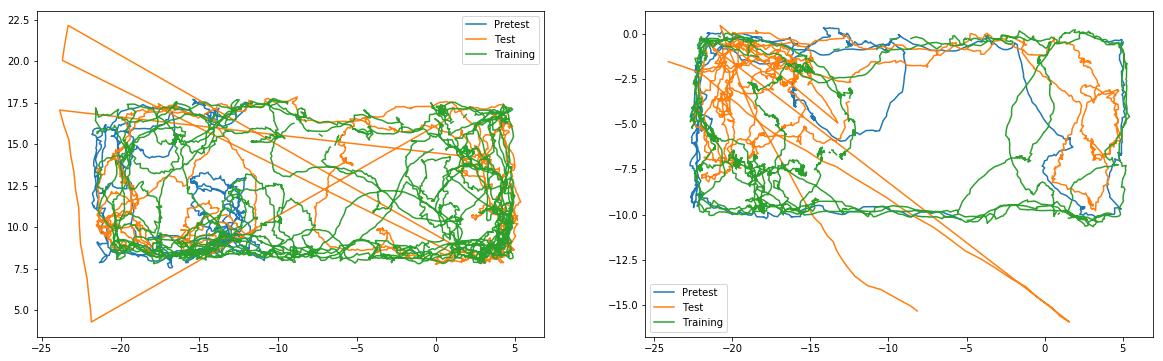

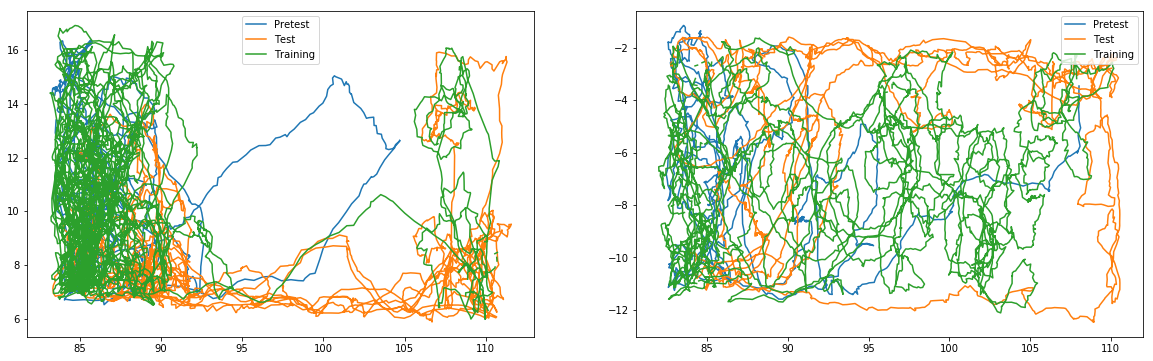

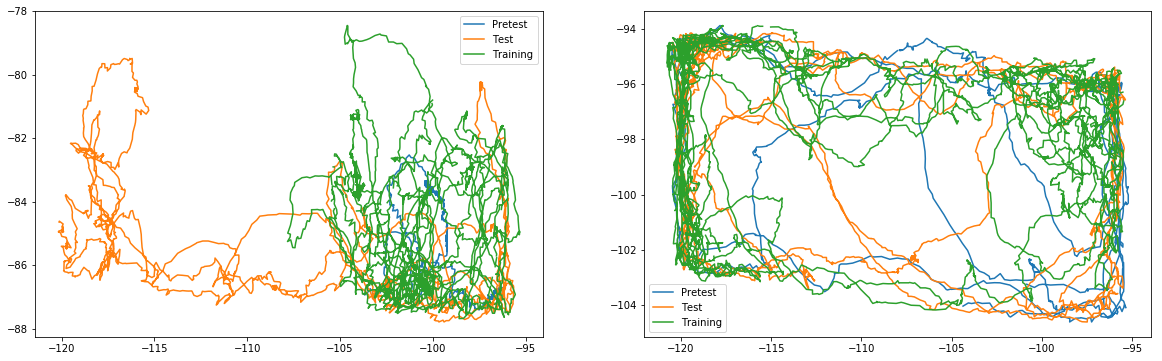

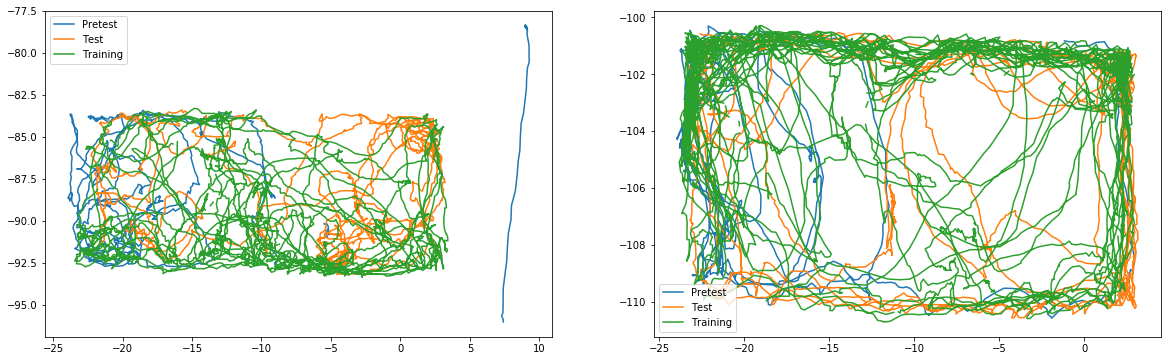

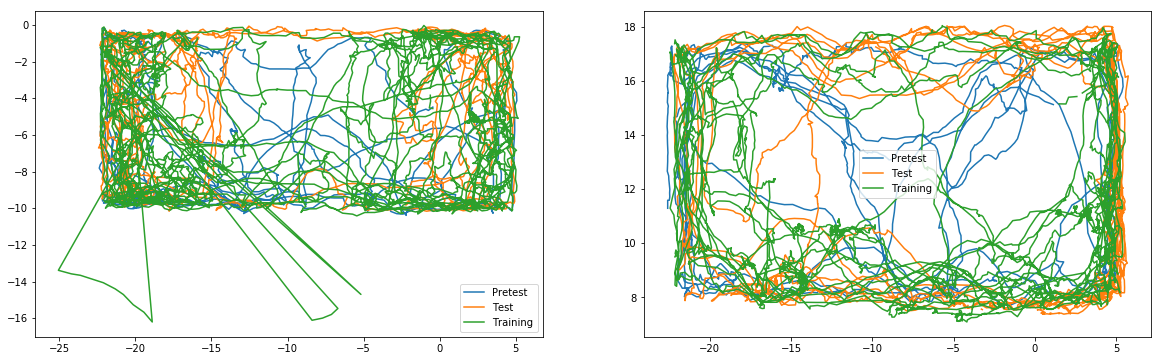

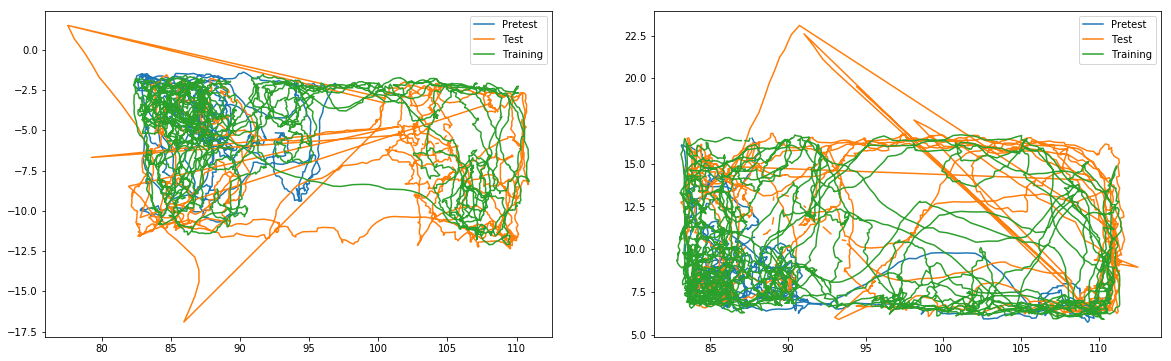

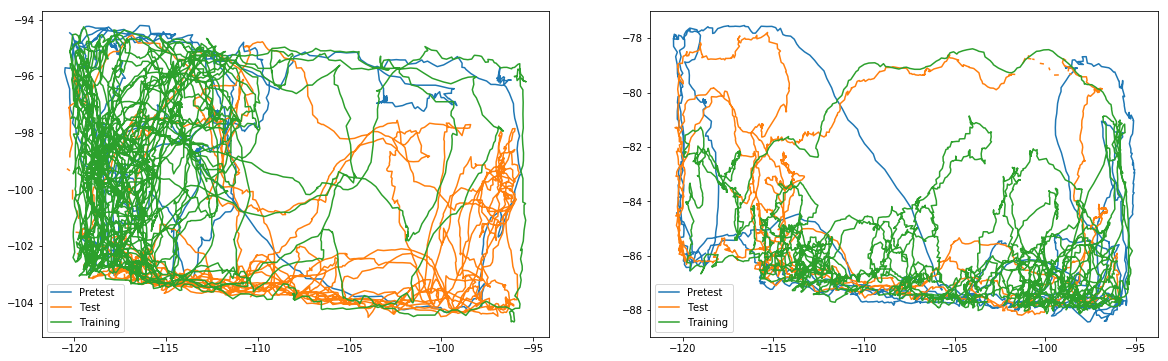

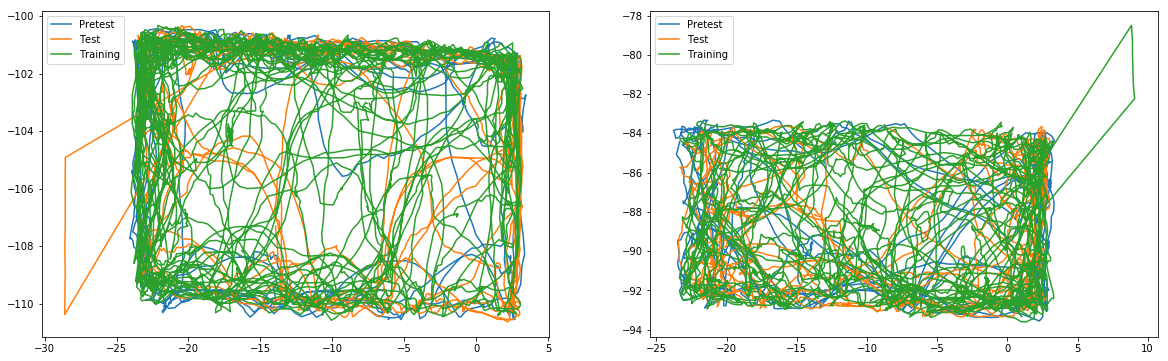

In [386]:
for i in range(len(gd.master)):
    plt.figure(figsize=(20,6))
    plt.subplot(121)
    plt.plot(list(gd.master[i].rawData["X center"][gd.master[i].rawData.Pretest=="1"]), \
             list(gd.master[i].rawData["Y center"][gd.master[i].rawData.Pretest=="1"]),label="Pretest")
    
    plt.plot(list(gd.master[i].rawData["X center"][gd.master[i].rawData.Test=="1"]), \
             list(gd.master[i].rawData["Y center"][gd.master[i].rawData.Test=="1"]),label="Test")
    
    
    plt.plot(list(gd.master[i].rawData["X center"][gd.master[i].rawData.Training=="1"]),\
             list(gd.master[i].rawData["Y center"][gd.master[i].rawData.Training=="1"]),label="Training")
    plt.legend()
    plt.subplot(122)
    plt.plot(list(gd.yorked[i].rawData["X center"][gd.yorked[i].rawData.Pretest=="1"]), \
             list(gd.yorked[i].rawData["Y center"][gd.yorked[i].rawData.Pretest=="1"]),label="Pretest")
    
    plt.plot(list(gd.yorked[i].rawData["X center"][gd.yorked[i].rawData.Test=="1"]), \
             list(gd.yorked[i].rawData["Y center"][gd.yorked[i].rawData.Test=="1"]),label="Test")
    
    plt.plot(list(gd.yorked[i].rawData["X center"][gd.yorked[i].rawData.Training=="1"]),\
             list(gd.yorked[i].rawData["Y center"][gd.yorked[i].rawData.Training=="1"]),label="Training")
    
    plt.legend()
    plt.show()
    

、、

## 一些问题

- 数据填充


- 没有温度数据

- 错误跟踪

- 可以分析的点